In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, roc_curve, auc, average_precision_score, RocCurveDisplay
import scipy.stats as stats
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif           
import shap


# Load the dataset
df = pd.read_csv('Dataset/diabetes.csv')

## Load dataset information

In [3]:
# Load dataset information
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Count Outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Data type & Null count

In [6]:
# Data type & Null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check for null values in specific columns
print("Null values in Pregnancies column: {0}".format(df['Pregnancies'].isnull().sum()))
print("Null values in Glucose column: {0}".format(df['Glucose'].isnull().sum()))
print("Null values in BloodPressure column: {0}".format(df['BloodPressure'].isnull().sum()))
print("Null values in SkinThickness column: {0}".format(df['SkinThickness'].isnull().sum()))
print("Null values in Insulin column: {0}".format(df['Insulin'].isnull().sum()))
print("Null values in BMI column: {0}".format(df['BMI'].isnull().sum()))
print("Null values in DiabetesPedigreeFunction column: {0}".format(df['DiabetesPedigreeFunction'].isnull().sum()))
print("Null values in Age column: {0}".format(df['Age'].isnull().sum()))
print("Null values in Outcome column: {0}".format(df['Outcome'].isnull().sum()))

Null values in Pregnancies column: 0
Null values in Glucose column: 0
Null values in BloodPressure column: 0
Null values in SkinThickness column: 0
Null values in Insulin column: 0
Null values in BMI column: 0
Null values in DiabetesPedigreeFunction column: 0
Null values in Age column: 0
Null values in Outcome column: 0


# Check if there have missing value (0) or not

In [9]:
# Check if there have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 5
No. of rows with BloodPressure 0 is: 35
No. of rows with SkinThikness 0 is: 227
No. of rows with Insulin 0 is: 374
No. of rows with BMI 0 is: 11
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


# Fill missing value (0) by its mean

In [11]:
# Fill missing value (0) by its mean
Fill_Mean = SimpleImputer(strategy='mean', missing_values=0)
#Fill_Mean = Fill_Mean.fit(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
#df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Fill_Mean.transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Fill_Mean = Fill_Mean.fit(df[['Glucose','BloodPressure','BMI','SkinThickness','Insulin']])
#df[['Glucose','BloodPressure','SkinThickness','BMI']] = Fill_Mean.transform(df[['Glucose','BloodPressure','SkinThickness','BMI']])
df[['Glucose','BloodPressure','BMI','SkinThickness','Insulin']] = Fill_Mean.transform(df[['Glucose','BloodPressure','BMI','SkinThickness','Insulin']])

# Check if there still have missing value (0) or not

In [13]:
# Check if there still have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with SkinThikness 0 is: 0
No. of rows with Insulin 0 is: 0
No. of rows with BMI 0 is: 0
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


## Check dataset

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Check Normal Distribution (Q-Q plot)

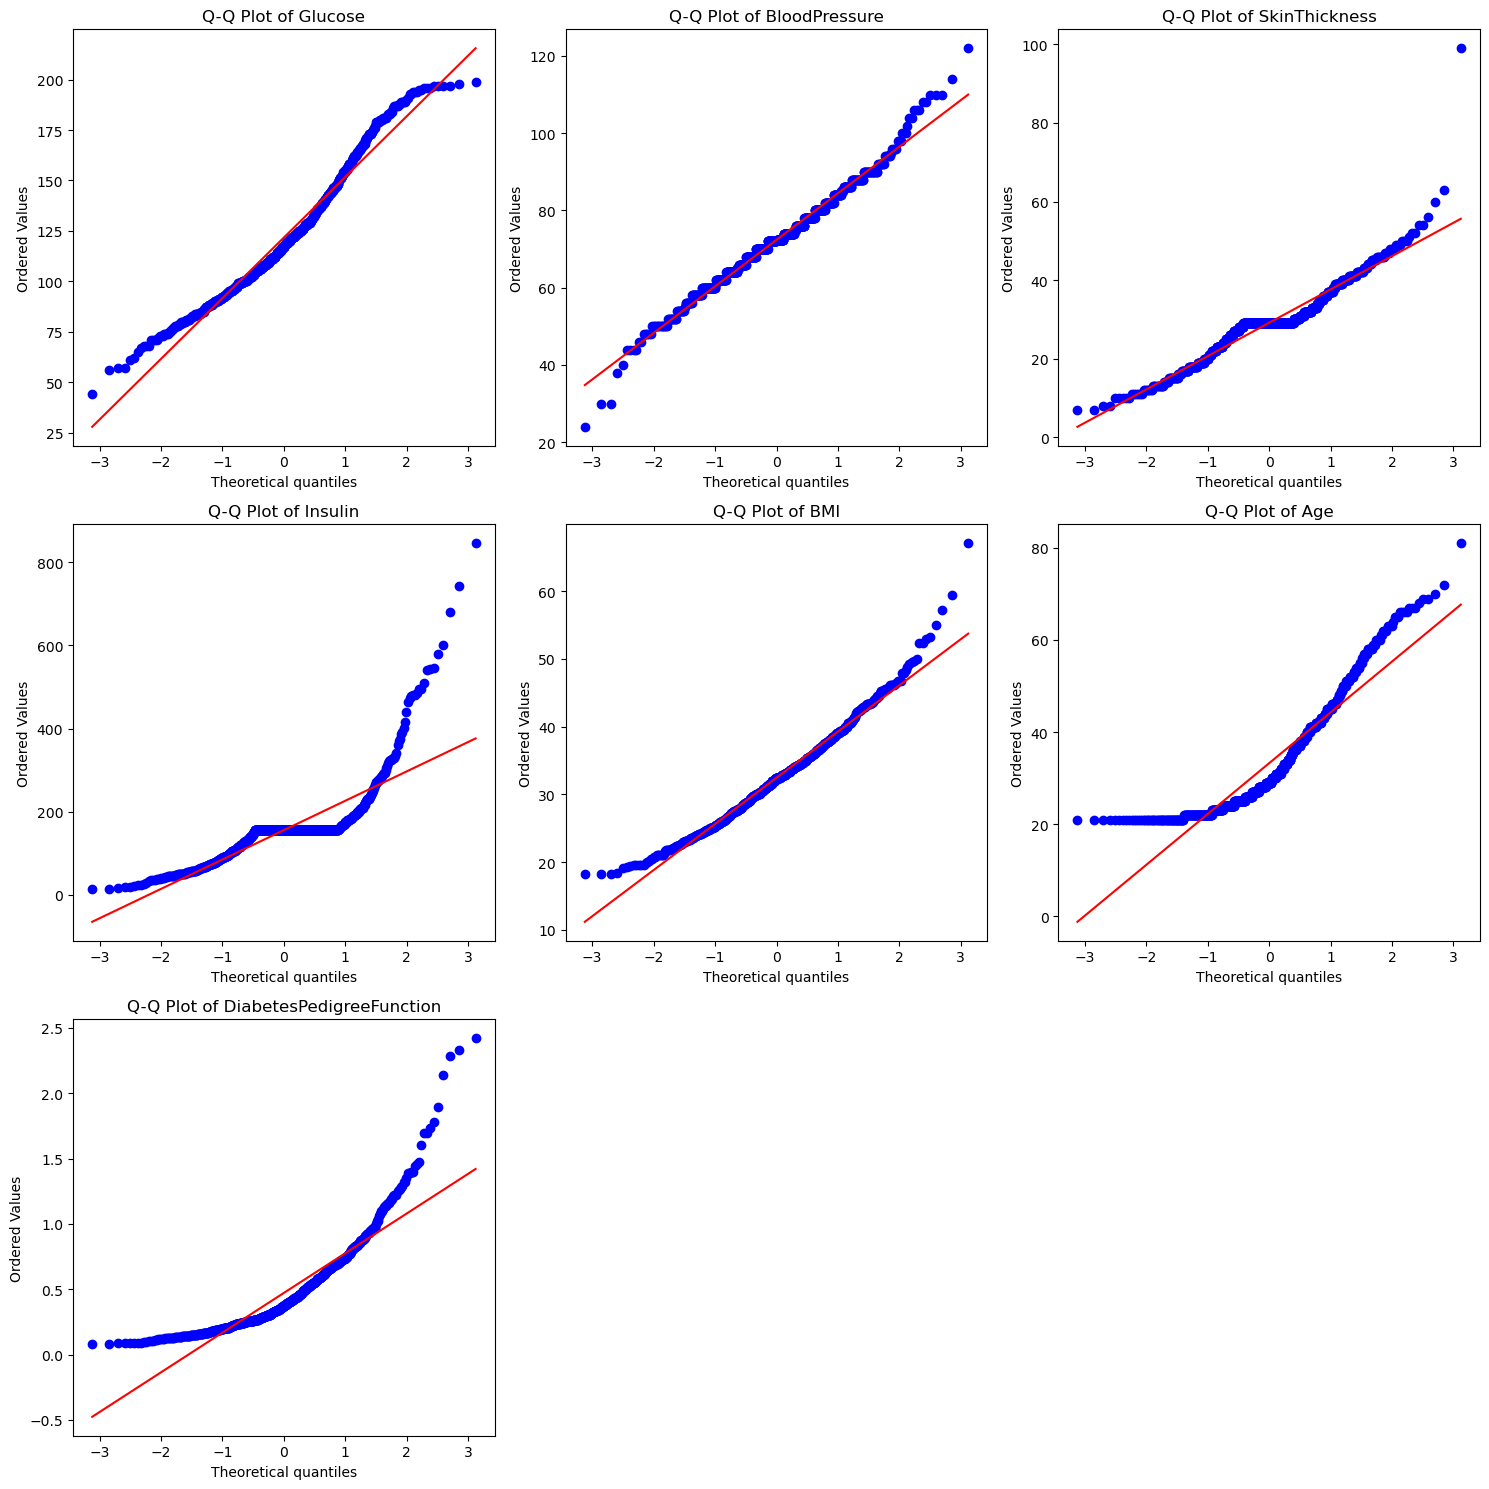

In [18]:
# Create Q-Q plots
def qq_plot(data, feature, ax):
    stats.probplot(data[feature], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot of {feature}')

# Plot Q-Q graphs for the features in a 3x3 grid
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    qq_plot(df, feature, axs[row, col])

# Hide any empty subplots
for j in range(i + 1, 9):
    row = j // 3
    col = j % 3
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()


## Check Feature importance

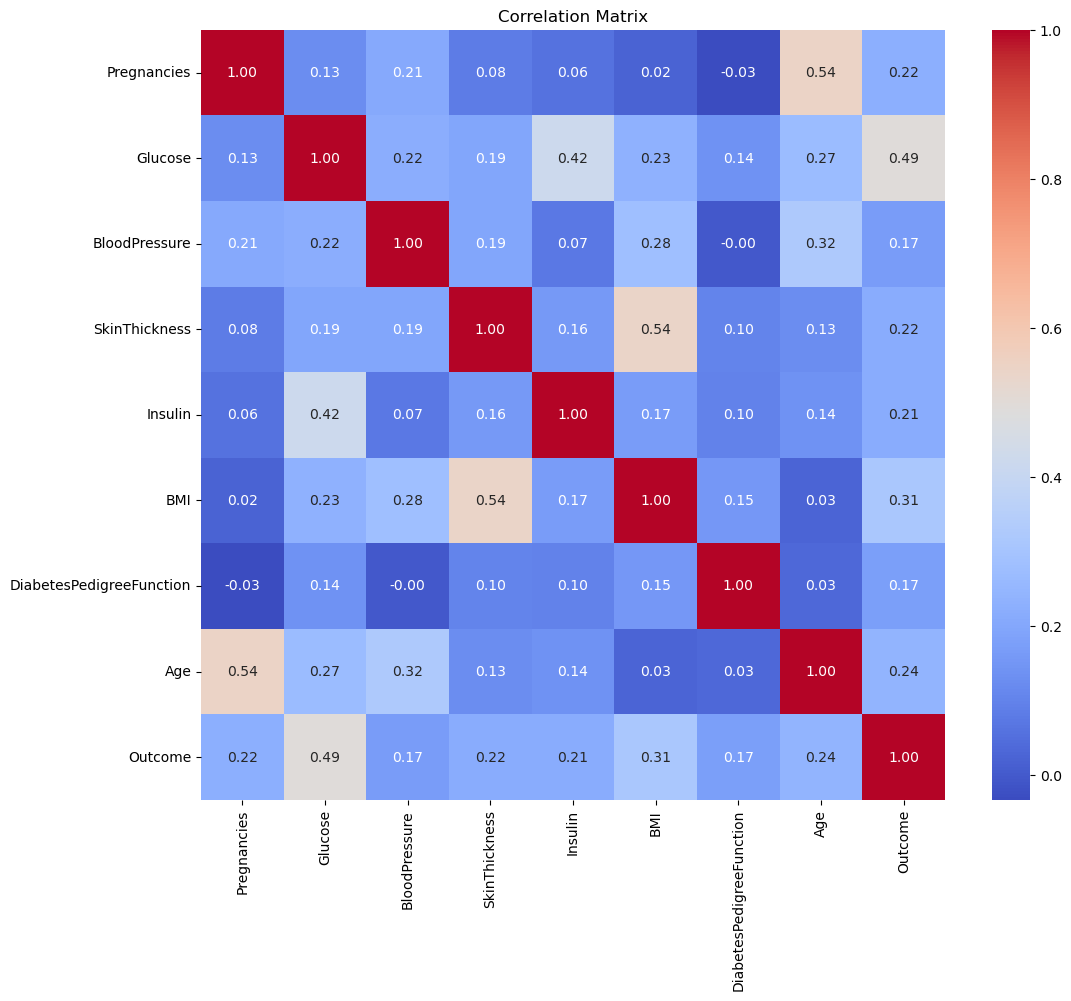

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


# Define Features && last column "Outcome" as Class

In [22]:
# Define Features && last column "Outcome" as Class
#X = df.iloc[:, :-1]  # Features = "Pregnancies" , "Glucose", "BloodPressure", "SkinThickness", "Inssulin", "BMI", "DiabetesPedigreeFunction", "Age"
#selected_features = ['Glucose', 'Insulin', 'BMI','Age'] #76% XGB & 78% RF
selected_features = ['Glucose', 'Insulin', 'BMI', 'SkinThickness'] # 77.2% xgb & 76.6% RF
#selected_features = ['Glucose', 'Insulin', 'BMI','BloodPressure', 'Age'] # 72.7% XGB & 79.2% RF
#selected_features = ['Glucose', 'Insulin', 'BMI','BloodPressure', 'Age', 'SkinThickness']  # 72% XGB & 78% RF
X = df[selected_features]
y = df.iloc[:, -1]   # Class = "Outcome"


## Split data (80:20)

In [24]:
# Split data (80 Train: 20 test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,  stratify =y) # paper

## Feature Scaling (Standardization)

In [26]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
#numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Fit the scaler on the training data
#X_train_scaled = scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

# Transform the testing data
#X_test_scaled = scaler.transform(X_test)
X_test = scaler.transform(X_test)


# Check Feature importance

[0.12137908 0.04213868 0.07448958 0.        ]


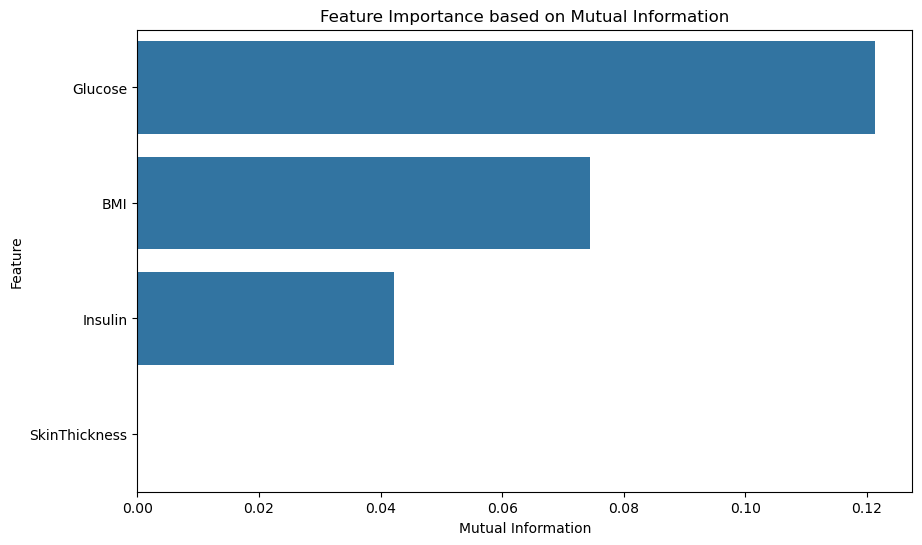

In [28]:
# Check Feature importance
# Calculate mutual information
#mi = mutual_info_classif(X_train, y_train)
mi = mutual_info_classif(X_train, y_train, random_state=42)
#mi = mutual_info_classif(X, y)
#mi = mutual_info_classif(X, y, random_state=42)
print(mi)

# Create a DataFrame for easier visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

# Sort by importance
mi_df = mi_df.sort_values('Mutual Information', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Feature Importance based on Mutual Information')
plt.show()


## Processing Imbalance data with SMOTE

In [30]:
# Processing Imbalance data with SMOTE
#smote = SMOTE(random_state=42)
#X_train, y_train = smote.fit_resample(X_train, y_train)

## Check "Outcome" balanced or not

In [32]:
# Check "Outcome" balanced or not
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

# XGB

In [34]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
#xgbc = XGBClassifier(colsample_bytree = 0.8,
# gamma= 0,
# learning_rate=0.2,                   
# max_depth= 10,
# min_child_weight= 1,
# n_estimators=100,
# subsample= 0.8,
# objective= 'binary:logistic',
# nthread= -1,
# scale_pos_weight=3).fit(X_train, y_train) # 75.324% 77Pre 75Recall 76F1-Score

#better at now (26/12/24) paper
#xgbc = XGBClassifier(colsample_bytree = 0.8,
# gamma= 1,
# max_depth= 3,
# min_child_weight= 1,
# subsample= 0.8,
# objective= 'binary:logistic',
# nthread= -1,
# scale_pos_weight=1).fit(X_train, y_train)

xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 learning_rate=0.1,                   
 max_depth= 8,
 min_child_weight= 1,
 n_estimators=100,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train) #80.519% 80Pre 81Recall 80F1-Score

In [35]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[87 13]
 [17 37]]
Accuracy Score 0.8051948051948052
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       100
           1       0.74      0.69      0.71        54

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



In [36]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7226466344113402 +/- 0.0174635791667033


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameter
#rf = RandomForestClassifier(bootstrap=True, 
#                            max_depth=10, 
#                            max_features='sqrt', 
#                            min_samples_leaf=1, 
#                            min_samples_split=2,  # Correct parameter name
#                            n_estimators=100)


###The hyperparameter we got from grid search (better at not 26/12/24))
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

# Fit the model
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [39]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))
     

[[84 16]
 [17 37]]
Accuracy Score 0.7857142857142857
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       100
           1       0.70      0.69      0.69        54

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.79      0.79       154



In [40]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7161021984551397 +/- 0.02474603901204746


# AUC

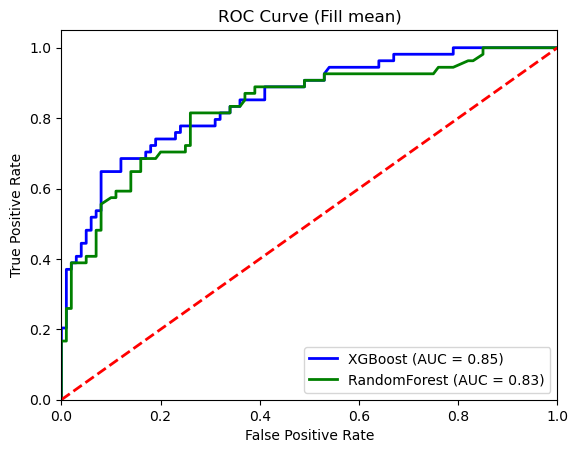

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get predicted probabilities
xgbc_pred_proba = xgbc.predict_proba(X_test)[:, 1]
rf_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for XGBoost
fpr_xgbc, tpr_xgbc, _ = roc_curve(y_test, xgbc_pred_proba)
auc_xgbc = roc_auc_score(y_test, xgbc_pred_proba)

# Calculate ROC curve and AUC for RandomForest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
auc_rf = roc_auc_score(y_test, rf_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgbc, tpr_xgbc, color='blue', lw=2, label=f'XGBoost (AUC = {auc_xgbc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'RandomForest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Fill mean)')
plt.legend(loc="lower right")
plt.show()
